In [27]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [28]:
iris=datasets.load_iris()

In [29]:
x_vals=np.array([x[0:3] for x in iris.data])
y_vals=np.array([x[3] for x in iris.data])
sess=tf.Session()

In [30]:
seed=2
tf.set_random_seed(seed)
np.random.seed(seed)

In [31]:
train_indices=np.random.choice(len(x_vals),round(len(x_vals)*0.8),replace=False)
test_indices=np.array(list(set(range(len(x_vals)))-set(train_indices)))

/Users/edwin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [32]:
x_vals_train=x_vals[train_indices]
x_vals_test=x_vals[test_indices]
y_vals_train=y_vals[train_indices]
y_vals_test=y_vals[test_indices]
def normalize_cols(m):
    col_max=m.max(axis=0)
    col_min=m.min(axis=0)
    return (m-col_min)/(col_max-col_min)

x_vals_train=np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test=np.nan_to_num(normalize_cols(x_vals_test))

In [33]:
batch_size=5
x_data=tf.placeholder(shape=[None,3],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)

### begin to create neural network models

In [34]:
hidden_layer_nodes = 5
A1=tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]))
b1=tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2=tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1]))
b2=tf.Variable(tf.random_normal(shape=[1]))

In [35]:
hidden_output=tf.nn.relu(tf.add(tf.matmul(x_data,A1),b1))
final_output=tf.nn.relu(tf.add(tf.matmul(hidden_output,A2),b2))

In [36]:
loss=tf.reduce_mean(tf.square(y_target-final_output))

In [37]:
my_opt=tf.train.GradientDescentOptimizer(0.005)
train_step=my_opt.minimize(loss)
init=tf.global_variables_initializer()
sess.run(init)

### train model

In [38]:
# First we initialize the loss vectors from storage
loss_vec=[]
test_loss=[]
for i in range(500):
    # First we select a random set of indices fro the batch
    rand_index=np.random.choice(len(x_vals_train),size=batch_size)
    
    # We then select the training values
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    # Now we run the training step
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    
    # we save the training loss
    temp_loss=sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
    
    loss_vec.append(np.sqrt(temp_loss))
    
    # Finally, we run the test-set loss and save
    
    test_temp_loss=sess.run(loss,feed_dict={x_data:x_vals_test,y_target:np.transpose([y_vals_test])})
    
    test_loss.append(np.sqrt(test_temp_loss))
        
    if (i+1)%50==0:
        print('Generation: '+ str(i+1) + ' .Loss= ' + str(temp_loss))

Generation: 50 .Loss= 2.06
Generation: 100 .Loss= 4.034
Generation: 150 .Loss= 0.62
Generation: 200 .Loss= 2.972
Generation: 250 .Loss= 1.7
Generation: 300 .Loss= 1.55
Generation: 350 .Loss= 1.146
Generation: 400 .Loss= 3.226
Generation: 450 .Loss= 2.988
Generation: 500 .Loss= 1.73


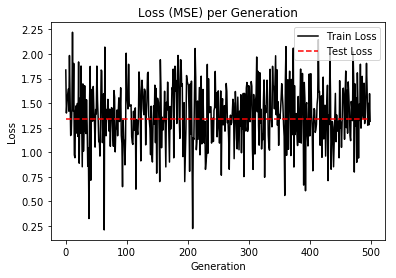

In [39]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Something looks wired for the training data and test loss